#Whatsapp chat analysis
whatsapp chat analysis using python3 and google colab


In order to observe and extract the data, we have to install and import few python libraries

In [1]:
!pip install emoji

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [3]:
! git clone https://github.com/amueller/word_cloud.git
% cd word_cloud
! pip install .

fatal: destination path 'word_cloud' already exists and is not an empty directory.
/content/word_cloud
Processing /content/word_cloud
  Created wheel for wordcloud: filename=wordcloud-1.8.0.post1+g5f23ed4-cp36-cp36m-linux_x86_64.whl size=338635 sha256=cfaa15310a4b46759e0f925d628f53fb22a56049ea004c13dc84c6143c0db51c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4yqk_38s/wheels/c9/9e/fe/b14c026a2af072dcf59543bce68dcdfff8a5362e6bb11242d9
Successfully built wordcloud
  Found existing installation: wordcloud 1.8.0.post1+g5f23ed4
    Uninstalling wordcloud-1.8.0.post1+g5f23ed4:
      Successfully uninstalled wordcloud-1.8.0.post1+g5f23ed4


#Data cleaning

In [4]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [6]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [7]:
def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d-%m-%Y").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%d-%m-%y").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d/%m/%Y").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%d/%m/%y").strftime("%Y-%m-%d")

In [8]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

#To import files into google colab

In [9]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Chat with tirumal.txt to WhatsApp Chat with tirumal.txt


In [10]:
parsedData = [] 
conversationPath = 'WhatsApp Chat with tirumal.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

11/08/2020, 11:50 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.



In [11]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
df["Date"] = pd.to_datetime(df["Date"])
df = df.dropna()
df["emoji"] = df["Message"].apply(split_count)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [12]:
df.head()

,Date,Time,Author,Message,emoji,urlcount
0,2020-11-08,12:01 pm,Varsha,Good morning baby,[],0
1,2020-11-08,12:01 pm,tirumal,Goodie mrng,[],0
2,2020-11-08,12:01 pm,Varsha,Eppudu lechav baby,[],0
3,2020-11-08,12:01 pm,tirumal,Ippudey 11 30 kii,[],0
4,2020-11-08,12:01 pm,Varsha,Ohh,[],0


In [13]:
df.tail()

,Date,Time,Author,Message,emoji,urlcount
35570,2020-09-20,5:28 pm,Varsha,🤣🤣,"[🤣, 🤣]",0
35571,2020-09-20,5:33 pm,Varsha,I'll also implement that,[],0
35572,2020-09-20,5:33 pm,Varsha,🥰,[🥰],0
35573,2020-09-20,5:51 pm,tirumal,yeah i ll send you our chats,[],0
35574,2020-09-20,5:51 pm,tirumal,nuvvu chaala delete chesuntav gaa,[],0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35477 entries, 0 to 35574
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      35477 non-null  datetime64[ns]
 1   Time      35477 non-null  object        
 2   Author    35477 non-null  object        
 3   Message   35477 non-null  object        
 4   emoji     35477 non-null  object        
 5   urlcount  35477 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.9+ MB


In [15]:
name = df.Author.unique()

In [16]:
df = df.dropna()

In [17]:
total_messages = df.shape[0]
print(total_messages)

35477


In [18]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [19]:
emojis = sum(df['emoji'].str.len())
print(emojis)

9289


In [20]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [21]:
links = np.sum(df.urlcount)

In [22]:
print("Messages:",total_messages)
print("Emojis:",emojis)
print("Links:",links)

Messages: 35477
Emojis: 9289
Links: 3


In [23]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")|(df["Message"] == " You deleted this message.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

we divided the total messages into furthur 2 grps-letter_count and word_count

In [24]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [25]:
l = messages_df.Author.unique()
for i in range(len(l)):
  req_df= messages_df[messages_df["Author"] == l[i]]
  print(f'Stats of {l[i]} -')
  print('Messages Sent', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  links = sum(link_messages[link_messages['Author'] == l[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Varsha -
Messages Sent 18176
Words per message 3.9678147007042255
Media Messages Sent 1270
Emojis Sent 6103
Links Sent 1

Stats of tirumal -
Messages Sent 15024
Words per message 4.721512247071352
Media Messages Sent 986
Emojis Sent 3186
Links Sent 2



In [26]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

160


In [27]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 1372), ('😚', 820), ('😏', 500), ('\U0001f97a', 500), ('😒', 486), ('\U0001f970', 464), ('😌', 414), ('🤤', 304), ('🤣', 279), ('😇', 269), ('🤗', 242), ('😭', 227), ('😡', 182), ('😙', 178), ('\U0001f971', 173), ('😴', 172), ('\U0001f92b', 153), ('😅', 137), ('🤙🏻', 137), ('😔', 137), ('☺️', 120), ('😊', 114), ('🙆🏻\u200d♂️', 114), ('🤙', 109), ('😐', 90), ('🙄', 89), ('🙁', 84), ('😕', 79), ('🙂', 71), ('🍆', 61), ('😋', 52), ('😬', 49), ('🙆\u200d♂️', 45), ('🤦\u200d♀️', 45), ('🍑', 45), ('❤️', 44), ('😱', 42), ('👋🏻', 40), ('🔥', 34), ('😞', 32), ('😗', 31), ('🙏', 29), ('😍', 28), ('🙈', 28), ('\U0001f928', 26), ('😈', 26), ('😘', 26), ('\U0001f92d', 26), ('😎', 22), ('\U0001f975', 22), ('🙆🏼\u200d♀️', 20), ('\U0001f973', 20), ('😳', 19), ('\U0001f976', 19), ('😵', 18), ('🤔', 18), ('☹️', 18), ('\U0001f9d0', 16), ('👍', 14), ('🙃', 13), ('🤐', 13), ('🤥', 13), ('👅', 13), ('😼', 12), ('😮', 12), ('🤢', 11), ('🤕', 11), ('😲', 10), ('😪', 8), ('\U0001f91f🏻', 8), ('🤝🏻', 7), ('😽', 7), ('🙊', 7), ('💪🏻', 7), ('👏🏻', 7), ('😯', 7), ('🙏🏻

In [28]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,1372
1,😚,820
2,😏,500
3,🥺,500
4,😒,486
...,...,...
155,🎣,1
156,🏀,1
157,🏹,1
158,🤮,1


Total number of emojis used

In [29]:
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

individual distribution

In [30]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Varsha


Emoji Distribution for tirumal


In [31]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

times when we are active

Text(0, 0.5, 'Time')

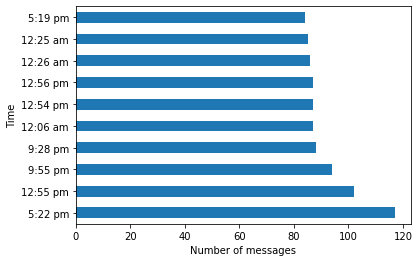

In [32]:
messages_df['Time'].value_counts().head(10).plot.barh()
plt.xlabel('Number of messages')
plt.ylabel('Time')

#word cloud!!!!

In [35]:
text = " ".join(review for review in messages_df.Message)
print ("Totally there are {} messages.".format(len(text)))

Totally there are 573325 messages.


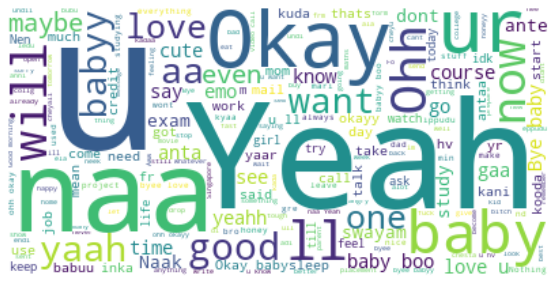

In [36]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

#personal word cloud

Author name Varsha


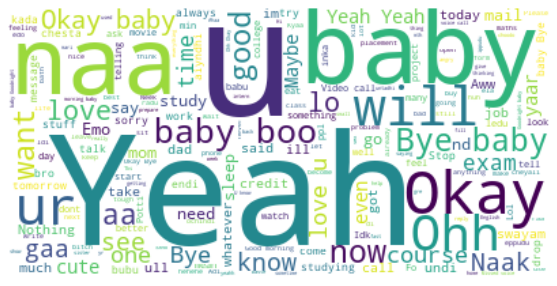

Author name tirumal


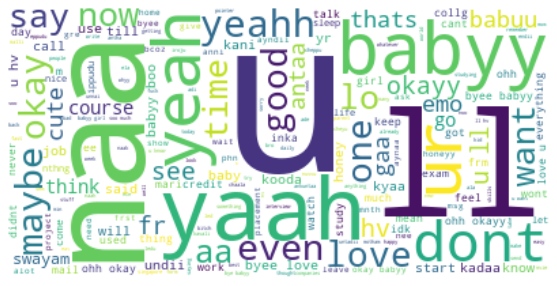

In [37]:
 l = messages_df.Author.unique()
 for i in range(len(l)):
   dummy_df = messages_df[messages_df['Author'] == l[i]]
   text = " ".join(review for review in dummy_df.Message)
   stopwords = set(STOPWORDS)
   stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
   print('Author name',l[i])
   wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
   plt.figure( figsize=(10,5))
   plt.imshow(wordcloud, interpolation='bilinear')
   plt.axis("off")
   plt.show()